In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as ff

In [54]:
def applyKernel(M,H):
    # H is in freq domain, M is not
    l,m = M.shape
    temp = np.zeros((l,m))
    # centering
    for i in range(l):
        for j in range(m):
            temp[i,j] = M[i,j]*((-1)**(i+j))
    
    tempF = ff.fft2(temp, norm='forward')
    
    filtered = tempF * H
    inv = ff.ifft2(filtered, norm='forward')
    for i in range(l):
        for j in range(m):
            inv[i,j] = inv[i,j] * ((-1) ** (i+j))
    
    return np.absolute(inv)


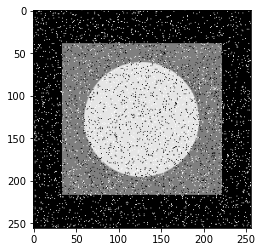

In [56]:
noisy = plt.imread('./imgs/noisy.tif')
plt.imshow(noisy, cmap='gray')

In [44]:
h,k = noisy.shape
ideal_H = np.zeros(noisy.shape)
mid = (math.floor(h/2), math.floor(k/2))
D0 = 20
for i in range(h):
    for j in range(k):
        d = (i - mid[0])**2 + (j - mid[1])**2
        if d <= D0**2:
            ideal_H[i,j] = 1



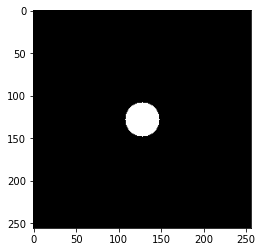

In [45]:
plt.imshow(ideal_H, cmap='gray')

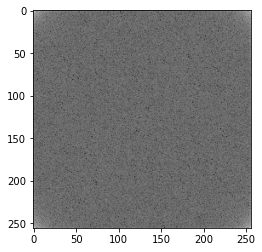

In [51]:
plt.imshow(np.log(np.absolute(ff.fft2(noisy, norm='forward'))), cmap='gray')

In [57]:
filtered = applyKernel(noisy, ideal_H)

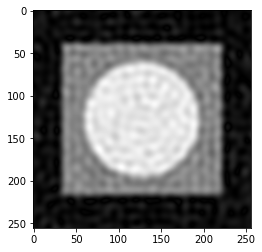

In [58]:
plt.imshow(filtered, cmap='gray')

In [59]:
gaussian_H = np.zeros(noisy.shape)

In [64]:
for i in range(h):
    for j in range(k):
        d = (i - mid[0])**2 + (j - mid[1])**2
        gaussian_H[i,j] = math.e**(-d/(2*D0**2))
        

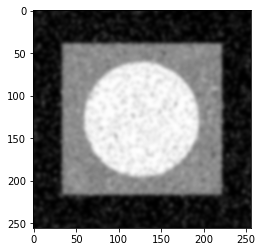

In [65]:
filtered_g = applyKernel(noisy, gaussian_H)
plt.imshow(filtered_g, cmap='gray')

In [77]:
butterworth_H = np.zeros(noisy.shape)
n=2
for i in range(h):
    for j in range(k):
        d = (i - mid[0])**2 + (j - mid[1])**2
        butterworth_H[i,j] = 1 / (1 + (d/D0**2)**n)

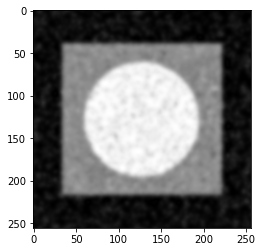

In [78]:
filtered_b = applyKernel(noisy, butterworth_H)
plt.imshow(filtered_b, cmap='gray')

## High pass filters

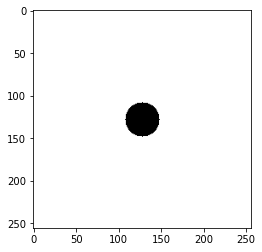

In [79]:
ideal_HPH = np.max(ideal_H) - ideal_H
plt.imshow(ideal_HPH, cmap='gray')

In [80]:
butterworth_HPH = np.max(butterworth_H) - butterworth_H
gaussian_HPH = np.max(gaussian_H) - gaussian_H

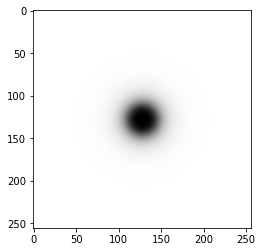

In [81]:
plt.imshow(butterworth_HPH, cmap='gray')

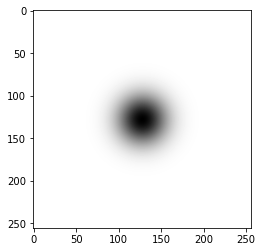

In [82]:
plt.imshow(gaussian_HPH, cmap='gray')

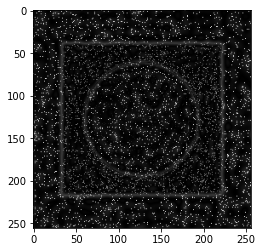

In [83]:
filtered_i_h = applyKernel(noisy, ideal_HPH)
plt.imshow(filtered_i_h, cmap='gray')

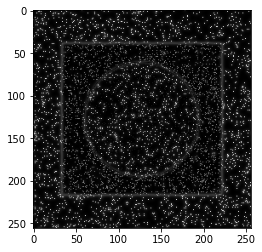

In [84]:
filtered_g_h = applyKernel(noisy, gaussian_HPH)
plt.imshow(filtered_g_h, cmap='gray')

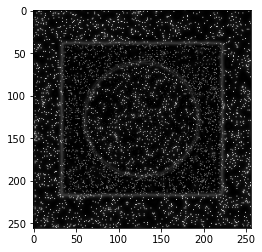

In [85]:
filtered_g_h = applyKernel(noisy, butterworth_HPH)
plt.imshow(filtered_g_h, cmap='gray')

## High boost and HFE filters

In [86]:
gaussian_HBH = 3 + gaussian_HPH

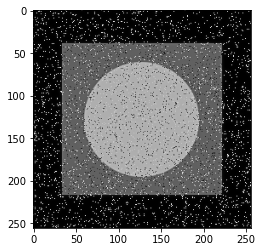

In [87]:
plt.imshow(applyKernel(noisy, gaussian_HBH), cmap='gray')

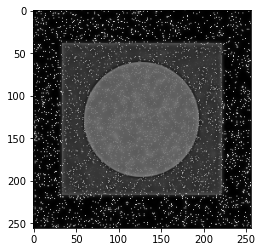

In [88]:
butterworth_HFEH = 2 + 3*butterworth_HPH
plt.imshow(applyKernel(noisy, butterworth_HFEH), cmap='gray')

## Laplacian in frequency domain

In [102]:
laplacian_HPH = np.zeros(noisy.shape)
for i in range(h):
    for j in range(k):
        d = (i - mid[0])**2 + (j - mid[1])**2
        laplacian_HPH[i,j] = -d* 4 * math.pi
        

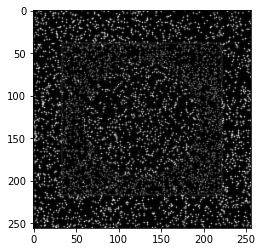

In [103]:
lap_filtered = applyKernel(noisy, laplacian_HPH)
plt.imshow(lap_filtered, cmap='gray')

In [108]:
lap_boosted = noisy - lap_filtered # done in the spatial domain due
                                     # to normalization reasons

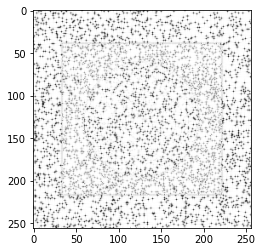

In [109]:
plt.imshow(lap_boosted, cmap='gray')